In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
def charger_data(data_path):
    data = pd.read_csv(data_path, sep=';')
    X = np.array(data.loc[ : , data.columns != 'Status'])
    Y = np.array(data['Status'])
    return X,Y

In [3]:
data_path = 'credit_scoring.csv'
X,Y =  charger_data(data_path)

In [4]:
X.shape

(4375, 13)

In [5]:
Y.shape

(4375,)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#Découper les données en 2, pour l'entrainnement, la validation et le test
def decouper_train_test(data_path, test_size=0.5):
    # charger les données
    X, y = charger_data(data_path)
    #decoupage en 2 pour l'entrainnement, la validation et le test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
    
    return X_train, y_train, X_test, y_test

In [8]:
X_train, y_train, X_test, y_test = decouper_train_test(data_path)
X_train.shape

(2187, 13)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree = DecisionTreeClassifier(random_state=1)
digit_tree=tree.fit(X_train, y_train)

# Estimation de l’erreur de prévision
1-digit_tree.score(X_test,y_test)

0.2728519195612431

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
data = pd.read_csv(data_path, sep=';')
X = data.iloc[:, 1:].values
SC = StandardScaler()
SC.fit(X)
Xnorm = SC.transform(X)
pca=PCA(n_components =12)
pca.fit(Xnorm)
X_pca = pca.transform(Xnorm)

In [13]:
import matplotlib
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

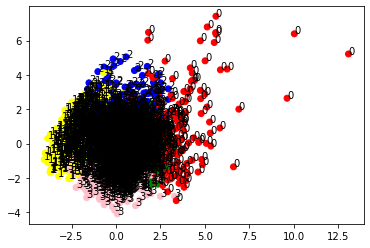

In [14]:
n_clusters = 5

clustering = KMeans(n_clusters, random_state=0).fit(Xnorm)
y_kmeans = clustering.predict(Xnorm)
colors = ['red','yellow','blue','pink', 'green']
labels = clustering.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y_kmeans, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [15]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

In [16]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(40, 20), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(40, 20), random_state=1,
              solver='lbfgs')

In [17]:
score = clf.score(X_test, y_test)

In [18]:
print(score)

0.7239488117001828
